In [70]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn import metrics
import pickle

In [21]:
data_dir = "../Data/Quora-Data/"

In [23]:
df_test = pd.read_csv(data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove.csv")
df_train = pd.read_csv(data_dir + "pre-processing/train_EDA1_preprocessing_with_lemma_EDA2_glove.csv")

In [24]:
clf = svm.LinearSVC()

In [25]:
pd.options.display.max_columns = 4000
df_train.head()

,id,qid1,qid2,q1_orig,q2_orig,num_word_q1,num_word_q2,num_char_q1,num_common_words,first_word_same,last_word_same,first_2_same,last_2_same,common_word_ratio,num_sent_diff,num_word_diff_ratio,question1,question2,num_word_q1_proc,num_word_q2_proc,num_char_q1_proc,num_common_words_proc,first_word_same_proc,last_word_same_proc,first_2_same_proc,last_2_same_proc,common_word_ratio_proc,num_sent_diff_proc,num_word_diff_ratio_proc,lcs_ratio_max,lcs_ratio_min,fuzz_rat,fuzz_part_rat,fuzz_rat_proc,fuzz_part_rat_proc,Y,glv_q1_0,glv_q1_1,glv_q1_2,glv_q1_3,glv_q1_4,glv_q1_5,glv_q1_6,glv_q1_7,glv_q1_8,glv_q1_9,glv_q1_10,glv_q1_11,glv_q1_12,glv_q1_13,glv_q1_14,glv_q1_15,glv_q1_16,glv_q1_17,glv_q1_18,glv_q1_19,glv_q1_20,glv_q1_21,glv_q1_22,glv_q1_23,glv_q1_24,glv_q1_25,glv_q1_26,glv_q1_27,glv_q1_28,glv_q1_29,glv_q1_30,glv_q1_31,glv_q1_32,glv_q1_33,glv_q1_34,glv_q1_35,glv_q1_36,glv_q1_37,glv_q1_38,glv_q1_39,glv_q1_40,glv_q1_41,glv_q1_42,glv_q1_43,glv_q1_44,glv_q1_45,glv_q1_46,glv_q1_47,glv_q1_48,glv_q1_49,glv_q2_0,glv_q2_1,glv_q2_2,glv_q2_3,glv_q2_4,glv_q2_5,glv_q2_6,glv_q2_7,glv_q2_8,glv_q2_9,glv_q2_10,glv_q2_11,glv_q2_12,glv_q2_13,glv_q2_14,glv_q2_15,glv_q2_16,glv_q2_17,glv_q2_18,glv_q2_19,glv_q2_20,glv_q2_21,glv_q2_22,glv_q2_23,glv_q2_24,glv_q2_25,glv_q2_26,glv_q2_27,glv_q2_28,glv_q2_29,glv_q2_30,glv_q2_31,glv_q2_32,glv_q2_33,glv_q2_34,glv_q2_35,glv_q2_36,glv_q2_37,glv_q2_38,glv_q2_39,glv_q2_40,glv_q2_41,glv_q2_42,glv_q2_43,glv_q2_44,glv_q2_45,glv_q2_46,glv_q2_47,glv_q2_48,glv_q2_49
0,394437,434361,527326,how do i install apk files on my windows phone?,"how can i backup a (.xap, / . appx) file insta...",10,15,10,6,1,1,0.5,1.0,0.230769,0.40,0.192308,install apk file window phone ?,"backup ( .xap , / . appx ) file installed wind...",6,13,6,4,0,1,0.0,1.0,0.230769,0.40,0.192308,0.267857,0.468750,0.61,0.74,0.53,0.84,0,0.574287,0.952050,-4.277600,-0.549085,-1.295090,-0.486051,4.119830,-3.576410,5.513970,2.382081,2.206471,1.446930,-16.645241,-1.701020,-1.327406,-0.610185,3.171266,0.393000,-0.45594,-0.731443,-5.777350,-2.023494,-0.215490,-1.148629,-3.765890,-1.912476,-1.026341,-0.831048,0.002410,3.238470,-0.544527,1.105740,0.738860,-4.517820,4.226392,-1.189130,1.245238,-1.476610,0.025200,-0.919003,-2.916834,5.118820,-3.509770,0.234040,2.361523,-1.118637,-3.009320,-1.617396,-0.426610,0.953710,2.140900,-1.313500,-2.522428,0.573515,-3.194859,2.150905,5.845458,-2.264090,1.683018,4.030598,4.147276,3.470965,-30.612049,-1.277566,0.043689,-2.880514,3.830866,-0.331105,-3.382467,-5.671059,-4.095040,-5.607650,0.250640,-1.685527,-1.027150,-6.354444,-1.618650,-1.929915,7.662377,4.665900,-3.675701,0.095530,-2.800520,-2.321861,8.122553,-1.460872,-1.616915,0.181258,-0.171130,-3.287157,-11.664200,8.680750,-4.210682,-0.877618,3.577368,-3.228940,-3.090590,-2.63903,-2.586603,-2.678800
1,373988,8023,10567,what were the major effects of the cambodia ea...,what were the major effects of the cambodia ea...,21,21,21,16,1,0,1.0,0.5,0.372093,0.00,0.000000,"major effect cambodia earthquake , effect comp...","major effect cambodia earthquake , effect comp...",11,11,11,7,1,1,1.0,0.5,0.372093,0.00,0.000000,0.657895,0.675676,0.94,0.94,0.90,0.89,1,-0.120880,3.837722,-1.053720,-3.296465,-0.714010,2.445542,2.620588,-4.252527,2.054083,-1.490960,0.663928,-5.806901,-23.884239,2.102450,4.855162,1.754219,3.643057,1.556430,3.11736,-3.867201,0.359980,-1.031261,-0.102270,-1.187550,1.001988,0.255240,-2.029098,3.563557,0.492540,0.968195,-0.603531,-1.257331,2.177843,-3.343814,4.474693,-1.517522,-3.877770,2.829770,2.312590,-0.481157,-6.212583,-3.802020,1.042250,0.677330,-2.902514,0.860566,-2.069741,0.767630,-2.543561,5.639610,0.218250,3.793712,-1.008630,-3.577785,-0.443080,2.070685,3.082438,-4.096248,1.530493,-1.377540,1.013253,-6.569045,-24.380604,2.047170,5.645012,1.124069,3.458947,0.988615,3.093950,-3.801201,0.641560,-1.593431,0.551240,-1.327090,0.829188,-0.625410,-1.796490,3.897860,0.992240,0.587566,-0.530769,-1.864751,1.506843,-2.741164,4.074643,-1.022972,-3.846110,2.669610,1.824077,0.12894

In [26]:
X_train=df_train.drop(columns=['id','qid1','qid2','q1_orig','q2_orig','Y','question1','question2'])
Y_train=df_train['Y']

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))

In [28]:
pca = PCA(n_components=2)
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_train.head()

,0,1
0,3.158813,-3.907216
1,-1.789552,-5.669392
2,-2.782725,-2.209915
3,-1.741517,2.620275
4,3.449313,-3.675731


In [29]:
pca_X_train.head()

,0,1
0,3.158813,-3.907216
1,-1.789552,-5.669392
2,-2.782725,-2.209915
3,-1.741517,2.620275
4,3.449313,-3.675731


In [30]:
clf.fit(pca_X_train,Y_train)

D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [31]:
X_test=df_test.drop(columns=['id','qid1','qid2','q1_orig','q2_orig','Y','question1','question2'])
Y_test=df_test['Y']

In [32]:
scaler2 = StandardScaler()
scaler2.fit(X_test)
X_test=pd.DataFrame(scaler2.transform(X_test))

In [33]:
pca_X_test = pd.DataFrame(pca.fit_transform(X_test))
pca_X_test.head()

,0,1
0,6.408079,-2.947223
1,-1.332875,4.146766
2,1.754814,0.717825
3,8.787983,2.888097
4,1.494084,-0.240151


In [34]:
Y_pred = clf.predict(pca_X_test)

In [37]:
print("Linear SVM PCA-2:"+str(metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.classification_report(Y_test, Y_pred,target_names=['0','1']))
print(metrics.confusion_matrix(Y_test, Y_pred))

Linear SVM PCA-2:0.6485072596403572
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     51128
           1       0.53      0.34      0.42     29730

    accuracy                           0.65     80858
   macro avg       0.61      0.58      0.58     80858
weighted avg       0.63      0.65      0.63     80858

[[42310  8818]
 [19603 10127]]


In [40]:
pickle.dump(clf, open("SVM_PCA2_0.65", 'wb'))

In [73]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

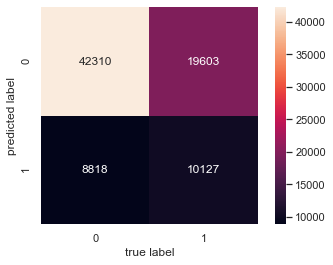

In [46]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [55]:
pca_data=pca_X_train.join(Y_train)
pca_data

,0,1,Y
0,3.158813,-3.907216,0
1,-1.789552,-5.669392,1
2,-2.782725,-2.209915,1
3,-1.741517,2.620275,1
4,3.449313,-3.675731,0
...,...,...,...
323427,-2.457762,-2.978578,0
323428,1.874056,-0.777181,1
323429,-1.301941,-3.804289,1
323430,1.404362,-4.725136,0


In [63]:
pca_X_train_np=pca_X_train.to_numpy()
print(pca_X_train_np[:,0])

[ 3.15881298 -1.78955215 -2.78272499 ... -1.30194139  1.40436164
 -5.88642814]


In [65]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No handles with labels found to put in legend.


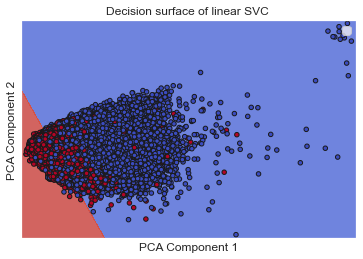

In [68]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = pca_X_train_np[:, 0], pca_X_train_np[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PCA Component 2')
ax.set_xlabel('PCA Component 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear']}

In [76]:
SVCpipe = Pipeline([('SVC',svm.LinearSVC())])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':[0.01,0.1,1, 10, 100]}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(pca_Xpca_X_train,Y_train)
print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

bestlinearSVC = linearSVC.best_estimator_

D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

{'SVC__C': 0.1}


D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


NameError: name 'y_train' is not defined

In [79]:
pca_X_train

,0,1
0,3.158813,-3.907216
1,-1.789552,-5.669392
2,-2.782725,-2.209915
3,-1.741517,2.620275
4,3.449313,-3.675731
...,...,...
323427,-2.457762,-2.978578
323428,1.874056,-0.777181
323429,-1.301941,-3.804289
323430,1.404362,-4.725136


In [80]:
bestlinearSVC.fit(pca_X_train,Y_train)
bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
bestlinearSVC.score(pca_X_train,Y_train)

D:\Anaconda3\envs\ml_2021\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.6453845012243686

No handles with labels found to put in legend.


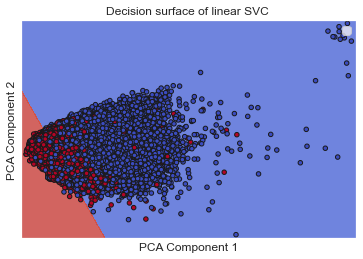

In [81]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = pca_X_train_np[:, 0], pca_X_train_np[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, bestlinearSVC, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PCA Component 2')
ax.set_xlabel('PCA Component 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [83]:
print("Linear SVM PCA-2:"+str(metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.classification_report(Y_test, Y_pred,target_names=['0','1']))
print(metrics.confusion_matrix(Y_test, Y_pred))

Linear SVM PCA-2:0.6485072596403572
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     51128
           1       0.53      0.34      0.42     29730

    accuracy                           0.65     80858
   macro avg       0.61      0.58      0.58     80858
weighted avg       0.63      0.65      0.63     80858

[[42310  8818]
 [19603 10127]]


In [84]:
bestlinearSVC.get_params()

{'memory': None,
 'steps': [('SVC', LinearSVC(C=0.1))],
 'verbose': False,
 'SVC': LinearSVC(C=0.1),
 'SVC__C': 0.1,
 'SVC__class_weight': None,
 'SVC__dual': True,
 'SVC__fit_intercept': True,
 'SVC__intercept_scaling': 1,
 'SVC__loss': 'squared_hinge',
 'SVC__max_iter': 1000,
 'SVC__multi_class': 'ovr',
 'SVC__penalty': 'l2',
 'SVC__random_state': None,
 'SVC__tol': 0.0001,
 'SVC__verbose': 0}

In [87]:
clf_01 = svm.LinearSVC(C=0.1,loss='log_loss')

In [89]:
clf_01.fit(pca_X_train,Y_train)

ValueError: Unsupported set of arguments: loss='log_loss' is not supported, Parameters: penalty='l2', loss='log_loss', dual=True